In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [15]:
df = pd.read_csv('wine_data.csv', header=None, usecols=[0,1,2])

In [23]:
df.columns = ['class label','Alcohol','Malic acid']

In [27]:
df.head()

,class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


<Axes: xlabel='Malic acid', ylabel='Density'>

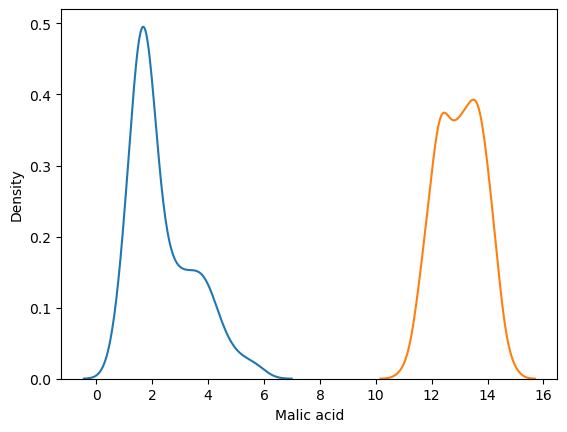

In [37]:
sn.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Density'>

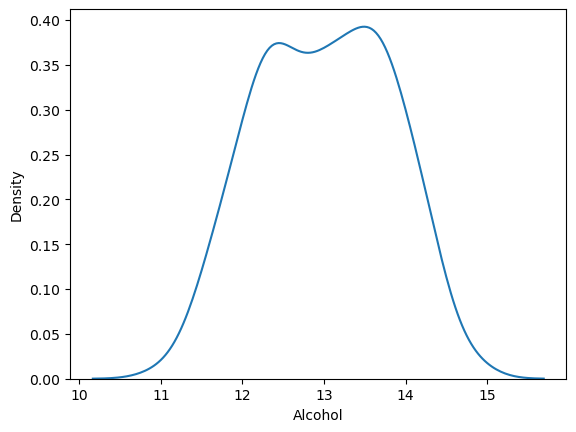

In [39]:
sn.kdeplot(df['Alcohol'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

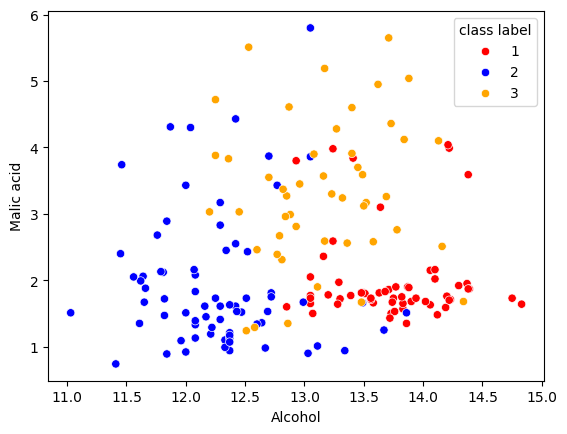

In [57]:
color_dict={1:"red",2:"blue",3:"orange"}
sn.scatterplot(data=df, x='Alcohol',y='Malic acid',hue=df['class label'],palette=color_dict)

In [71]:
from sklearn.model_selection import train_test_split

#dropData = df.drop('class label', axis=1)

#dropData

x_train,x_test,y_train,y_test = train_test_split(df.drop('class label', axis=1),df['class label'],test_size=0.3,random_state=0)

In [75]:
x_train.shape, x_test.shape

((124, 2), (54, 2))

In [77]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [83]:
x_train_scaler = pd.DataFrame(x_train_scaled, columns=x_train.columns)
x_test_scaler = pd.DataFrame(x_test_scaled, columns=x_test.columns)

In [85]:
np.round(x_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [91]:
np.round(x_train_scaler.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


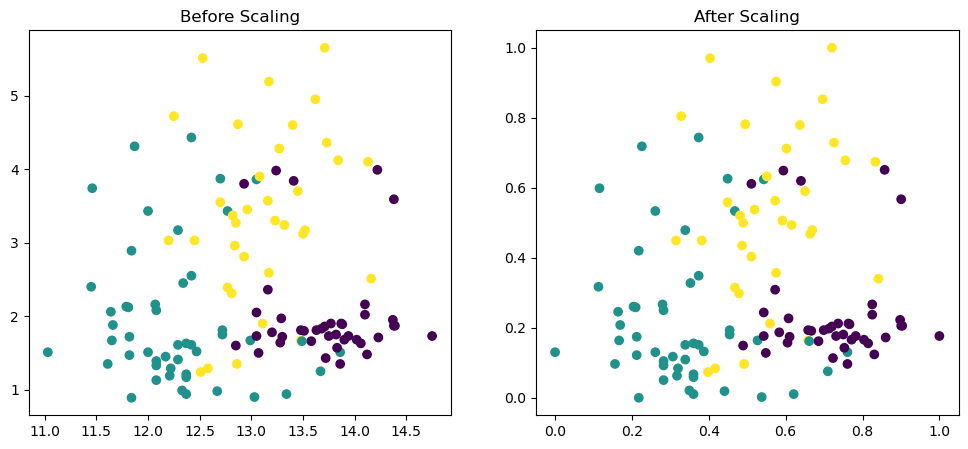

In [101]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(x_train['Alcohol'], x_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(x_train_scaler['Alcohol'], x_train_scaler['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

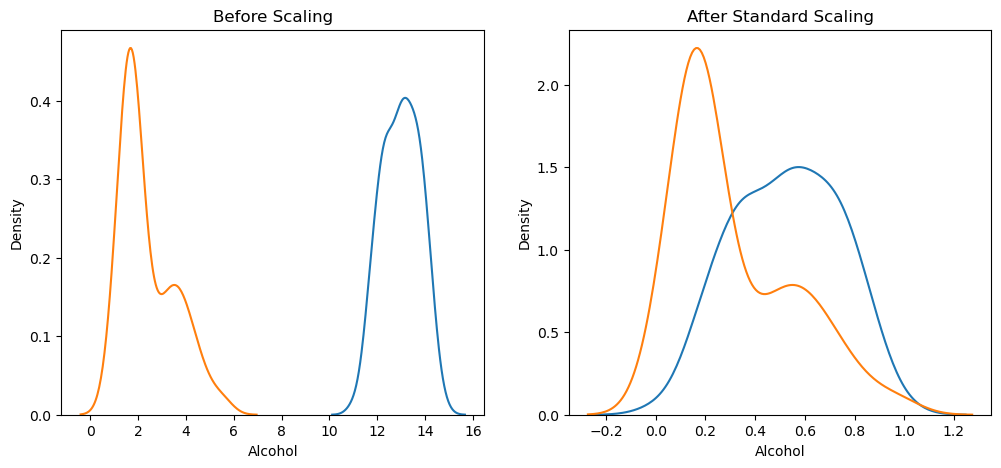

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sn.kdeplot(x_train['Alcohol'], ax=ax1)
sn.kdeplot(x_train['Malic acid'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sn.kdeplot(x_train_scaler['Alcohol'], ax=ax2)
sn.kdeplot(x_train_scaler['Malic acid'], ax=ax2)
plt.show()

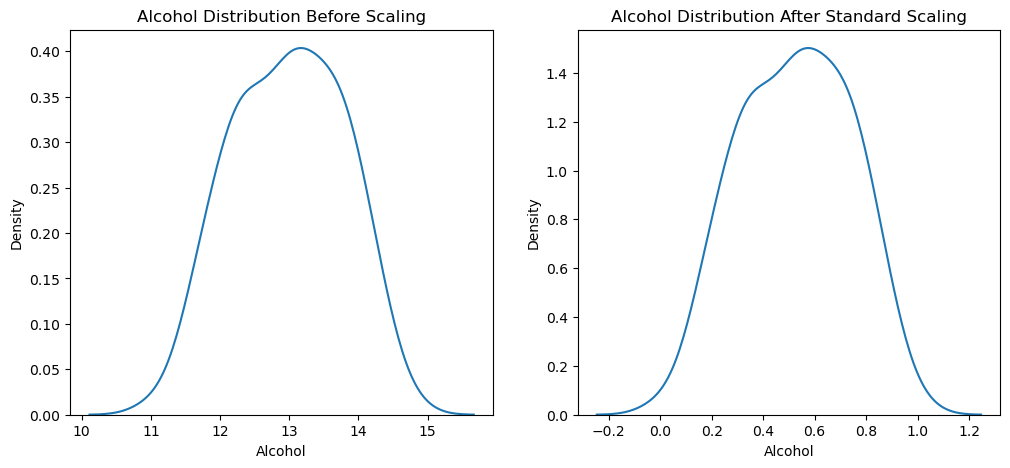

In [113]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Alcohol Distribution Before Scaling')
sn.kdeplot(x_train['Alcohol'], ax=ax1)

# after scaling
ax2.set_title('Alcohol Distribution After Standard Scaling')
sn.kdeplot(x_train_scaler['Alcohol'], ax=ax2)
plt.show()